In [1]:
!wget https://www.transfernow.net/dl/20220324B3yTAKnT

--2022-03-24 19:29:34--  https://www.transfernow.net/dl/20220324B3yTAKnT
Resolving www.transfernow.net (www.transfernow.net)... 104.26.14.166, 104.26.15.166, 172.67.72.33, ...
Connecting to www.transfernow.net (www.transfernow.net)|104.26.14.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.transfernow.net/en/dltransfer?utm_source=20220324B3yTAKnT [following]
--2022-03-24 19:29:34--  https://www.transfernow.net/en/dltransfer?utm_source=20220324B3yTAKnT
Reusing existing connection to www.transfernow.net:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘20220324B3yTAKnT.1’

20220324B3yTAKnT.1      [ <=>                ]  40.19K  --.-KB/s    in 0s      

2022-03-24 19:29:34 (94.3 MB/s) - ‘20220324B3yTAKnT.1’ saved [41154]



In [2]:
!unzip fer_images.zip

Archive:  fer_images.zip
replace fer_images/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Rescaling, Flatten, Activation
from tensorflow.keras.models import Sequential


In [4]:
image_size = (48,48)
batch_size = 32

trainingSet = tf.keras.preprocessing.image_dataset_from_directory(
    "fer_images/Training",  
    seed = 1337, 
    image_size = image_size, 
    batch_size = batch_size,
)

validationSet = tf.keras.preprocessing.image_dataset_from_directory(
    "fer_images/PrivateTest", 
    seed = 1337, 
    image_size = image_size, 
    batch_size = batch_size,
)

testSet = tf.keras.preprocessing.image_dataset_from_directory(
    "fer_images/PublicTest", 
    seed = 1337, 
    image_size = image_size, 
    batch_size = batch_size,
)



Found 28709 files belonging to 7 classes.
Found 3589 files belonging to 7 classes.
Found 3589 files belonging to 7 classes.


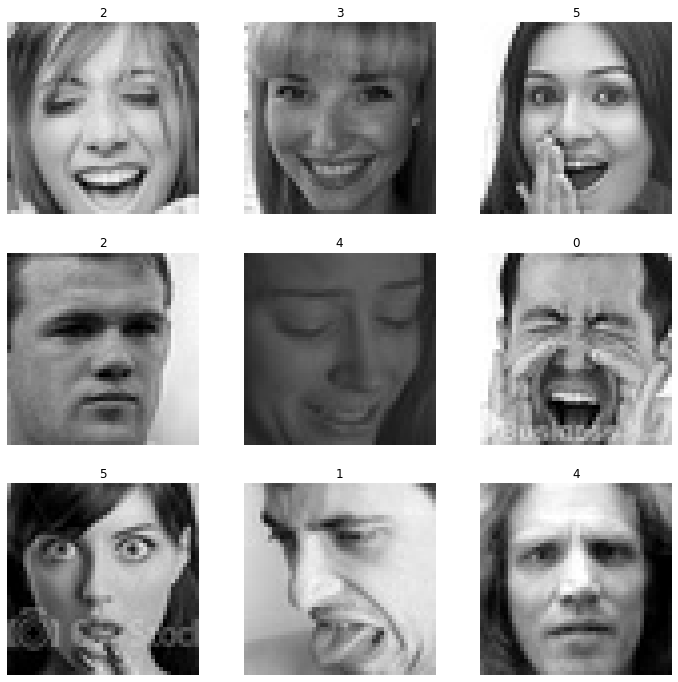

In [5]:
# %%
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
for images, labels in trainingSet.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
plt.show()

In [6]:
def my_model(input_shape, num_classes):
    #inputs = tf.keras.Input(shape=input_shape)
    # Image augmentation block
    #x = data_augmentation(inputs)
    model = Sequential()

    # Entry block
    model.add(Rescaling(1.0 / 255))
    model.add(Conv2D(64, (5, 5), strides=2, padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPool2D(pool_size=3, strides=2))


    model.add(Conv2D(64, (5, 5), padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPool2D(pool_size=3, strides=2))

    model.add(Conv2D(128, (4,4), padding="same"))
    model.add(Activation("relu"))

    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(
        units = 3072, 
        activation = 'relu'
    ))

    model.add(Dense(7, activation='softmax'))
    epochs = 100


    model.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    model.fit(
        trainingSet, epochs=epochs, batch_size = 16, validation_data=validationSet,
    )
    
    return model

In [7]:
model = my_model(image_size + (3,), 7)

Epoch 1/100
898/898 [==============================] - 14s 13ms/step - loss: 1.7051 - accuracy: 0.3120 - val_loss: 1.5935 - val_accuracy: 0.3664
Epoch 2/100
898/898 [==============================] - 11s 12ms/step - loss: 1.5470 - accuracy: 0.3921 - val_loss: 1.4774 - val_accuracy: 0.4285
Epoch 3/100
898/898 [==============================] - 11s 12ms/step - loss: 1.4720 - accuracy: 0.4244 - val_loss: 1.4271 - val_accuracy: 0.4508
Epoch 4/100
898/898 [==============================] - 11s 13ms/step - loss: 1.4133 - accuracy: 0.4552 - val_loss: 1.4269 - val_accuracy: 0.4583
Epoch 5/100
898/898 [==============================] - 11s 13ms/step - loss: 1.3623 - accuracy: 0.4749 - val_loss: 1.3687 - val_accuracy: 0.4684
Epoch 6/100
898/898 [==============================] - 11s 12ms/step - loss: 1.3153 - accuracy: 0.4942 - val_loss: 1.3464 - val_accuracy: 0.4684
Epoch 7/100
898/898 [==============================] - 11s 12ms/step - loss: 1.2678 - accuracy: 0.5138 - val_loss: 1.3267 - val_ac

In [10]:
model.save_weights('model.h5')